In [2]:
# Install scikit-learn if not already installed
%pip install scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 769.8 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.7 MB 797.2 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.7 MB 794.5 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.7 MB 794.5 kB/s eta 0:00:10
   ------ --------------------------------- 1.3/8.7 MB 834.1 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.7 MB 847.2 kB/s eta 0:00:09
   -------- ------------------------------- 1.8/8.7 MB 847.6 kB/s eta 0:00:09
   -------- ------------------------------- 1.8/8.7 MB 847.6 kB/s eta 0:00:09
   --------- ------------------------------ 2.1/8.7 MB 853.7 kB/s eta 0:00:08
   ---------- --------

In [3]:
# 1. Load and Inspect the Data
# Load the dataset
df = pd.read_csv('data.csv', sep=';') 

In [4]:
# Initial inspection
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Head:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2           

In [5]:
# 2. Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())  # No missing values found in the dataset

# Handle duplicates
df.drop_duplicates(inplace=True)
print(f"\nShape after removing duplicates: {df.shape}")

# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print("\nCleaned Column Names:")
print(df.columns)

# Encode the target variable
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['target'])
print("\nTarget Encoding Mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Missing Values:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                             

<Figure size 1500x1000 with 0 Axes>

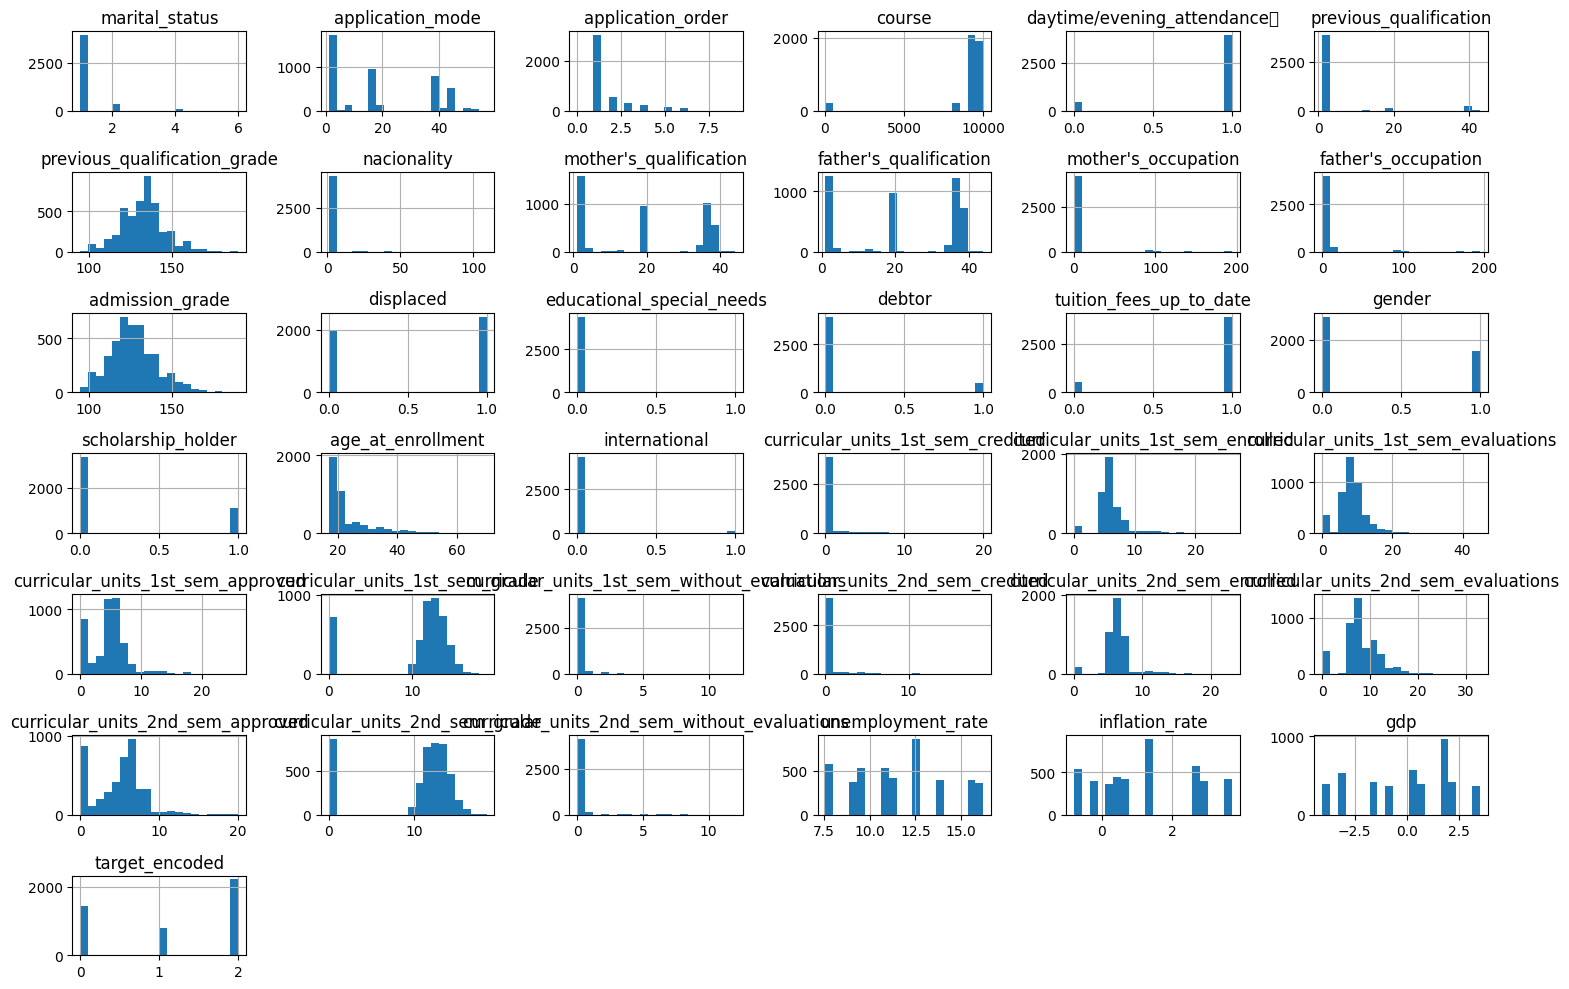

In [7]:
# 3. Exploratory Data Analysis (EDA)
# Univariate Analysis
plt.figure(figsize=(15, 10))
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()



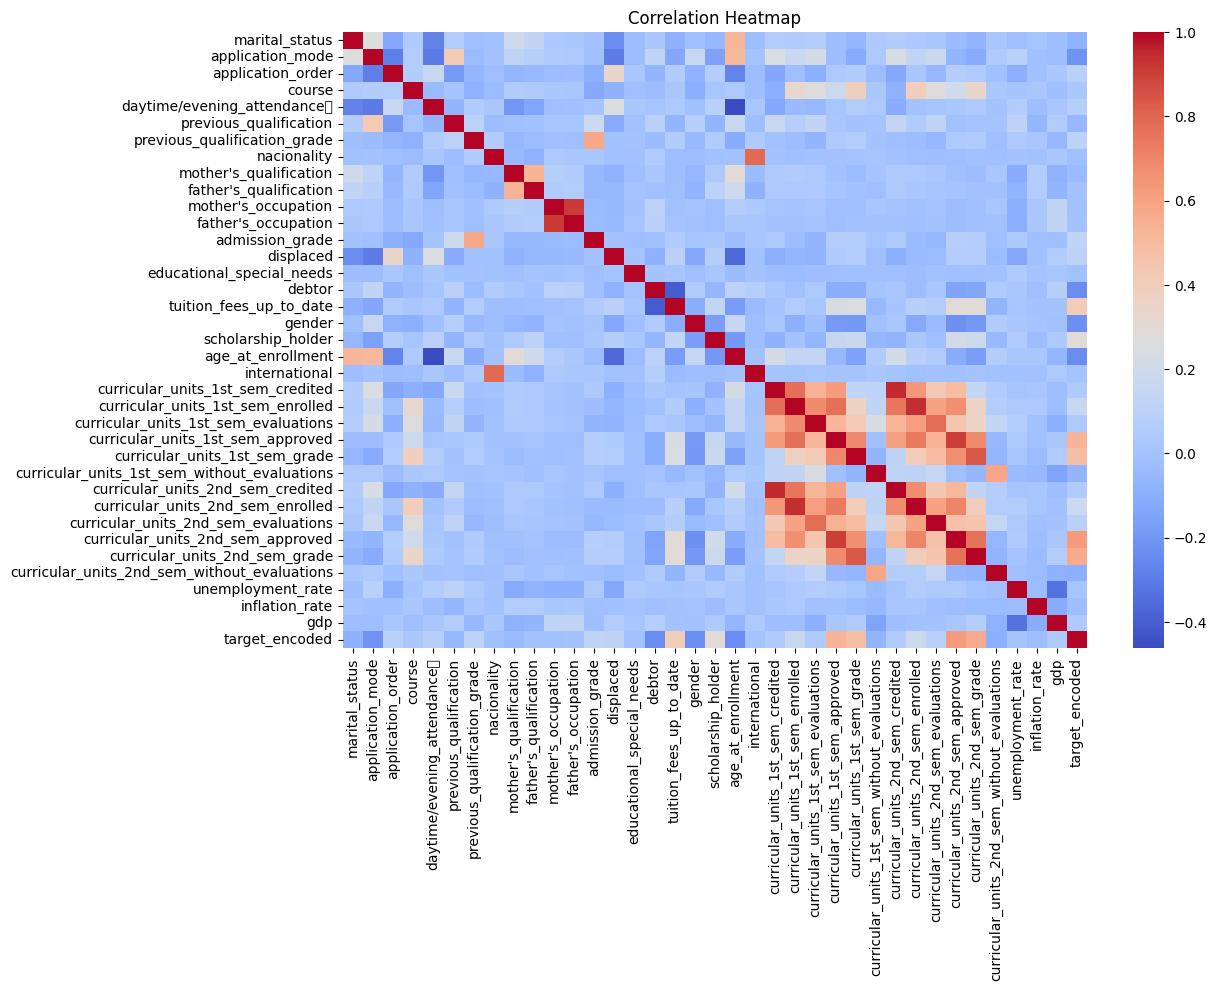

In [8]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

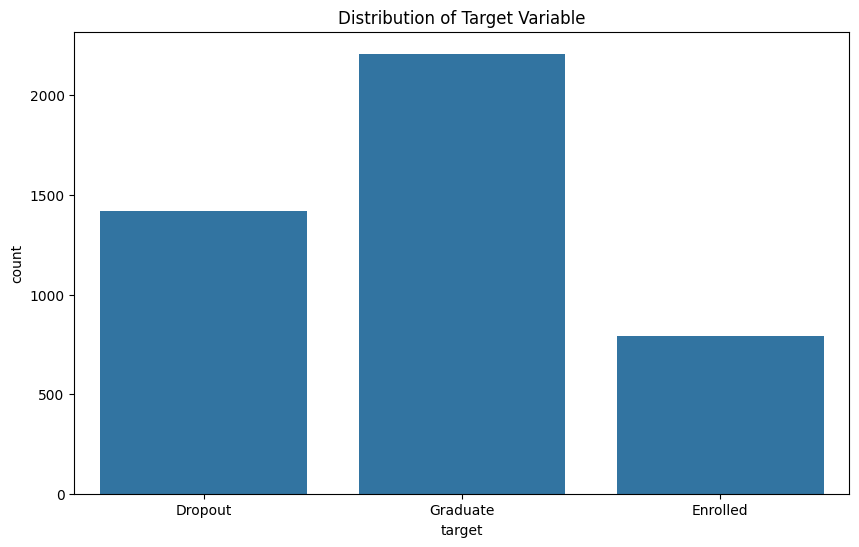

In [9]:
# Bivariate Analysis: Target vs. key features
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

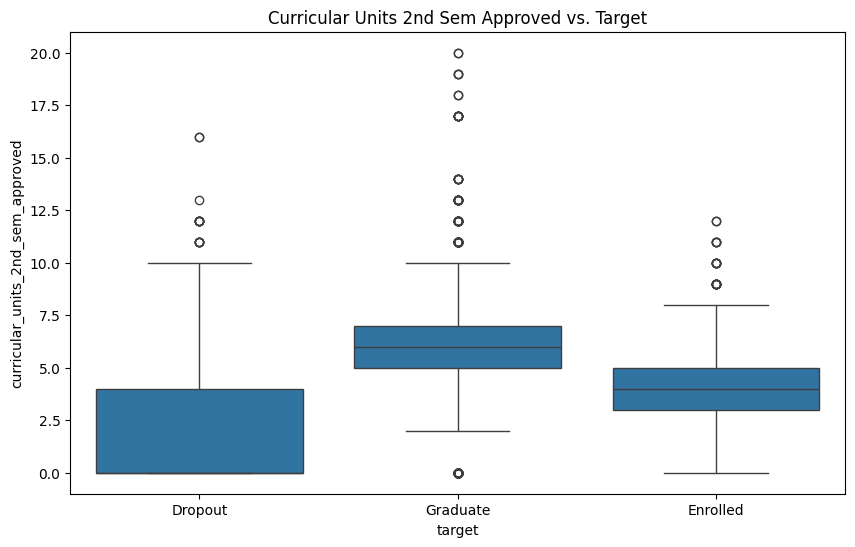

In [10]:

# Example: Curricular units 2nd sem (approved) vs. Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='curricular_units_2nd_sem_approved', data=df)
plt.title('Curricular Units 2nd Sem Approved vs. Target')
plt.show()

In [15]:
# 4. Feature Engineering
# Create new feature: average grade across semesters
df['avg_grade'] = (df['curricular_units_1st_sem_grade'] + df['curricular_units_2nd_sem_grade']) / 2

# Encode categorical variables (e.g., marital_status, application_mode)
categorical_col = ['marital_status', 'application_mode', 'course', 'daytime/evening_attendance\t', 
                   'previous_qualification', 'nacionality', 'mother\'s_qualification', 
                   'father\'s_qualification', 'mother\'s_occupation', 'father\'s_occupation']
df_encoded = pd.get_dummies(df, columns=categorical_col, drop_first=True)

# Save the cleaned and feature-engineered dataset to a new CSV file
df_encoded.to_csv('data_cleaned.csv', index=False)
print("\nCleaned and feature-engineered dataset saved as 'data_cleaned.csv'")

# Scale numerical features
numerical_cols = ['previous_qualification_grade', 'admission_grade', 'age_at_enrollment', 
                  'curricular_units_1st_sem_credited', 'curricular_units_1st_sem_enrolled', 
                  'curricular_units_1st_sem_evaluations', 'curricular_units_1st_sem_approved', 
                  'curricular_units_1st_sem_grade', 'curricular_units_2nd_sem_credited', 
                  'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations', 
                  'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 
                  'unemployment_rate', 'inflation_rate', 'gdp', 'avg_grade']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


Cleaned and feature-engineered dataset saved as 'data_cleaned.csv'


In [16]:
# 5. Split the Dataset
X = df_encoded.drop(['target', 'target_encoded'], axis=1)
y = df_encoded['target_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (3539, 239), Test set shape: (885, 239)


In [17]:
# 6. Model Selection and Training
# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Model Accuracy: 0.7593

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.75      0.76       284
    Enrolled       0.55      0.28      0.37       159
    Graduate       0.78      0.94      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.66       885
weighted avg       0.74      0.76      0.74       885



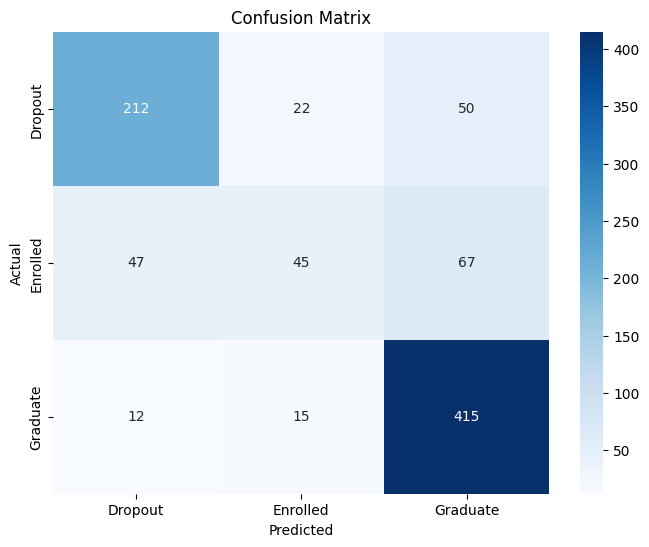


Cross-Validation Scores: 0.7717 +/- 0.0179


In [18]:
# 7. Model Evaluation
# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"\nCross-Validation Scores: {cv_scores.mean():.4f} +/- {cv_scores.std() * 2:.4f}")

In [19]:
# 8. Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# Evaluate best model
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Best Model Accuracy: 0.7695


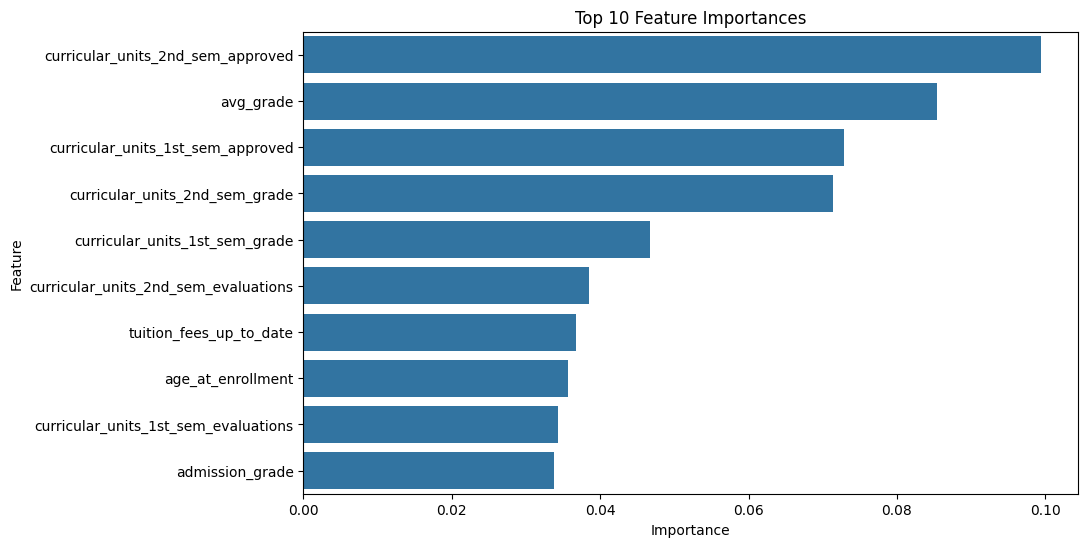

In [20]:
# 9. Feature Importance (Innovative Addition)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 10 Feature Importances')
plt.show()